# Extract and Transform
**Author:** Michael McCann<br>
**Last Update:** 29 MAY 2020

<u>Overview:</u> <br>
I have been asked to create a movie database using MySQL from the [Internet Movie Database's (IMDB)](https://www.imdb.com)  publicly available dataset supplemented with financial data extracted from [The Movie Database (TMDB)](https://www.themoviedb.org/) utilizing their API. The movie database created in this step will be later utilized for hypothesis testing and regression modeling. 


<u>Tasks:</u><br> 
- Extract IMDB dataset from their website (see reference below)
- Extract TMDB financial data using their API (see reference below)
- Inspect, clean, and transform datasets for database creation.
- save cleaned datasets for future use.
- Initial EDA


<u>References:</u><br>
- IMDB Data: https://datasets.imdbws.com <br>
- IMDB Data Dictionary: https://www.imdb.com/interfaces/ <br>
- TMDB API: https://developers.themoviedb.org/4/getting-started/authorization <br>
- TMDP API Package: https://github.com/celiao/tmdbsimple



## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json, os, math, time

import tmdbsimple as tmdb
from tqdm.notebook import tqdm_notebook

## Functions

### Movie Ratings Function

In [2]:
def movie_rating(movie_id):
    movie = tmdb.Movies(movie_id)
    info = movie.info()
    releases = movie.releases()
        
    for c in releases['countries']:
        if c['iso_3166_1'] == 'US':
            info['certification'] = c['certification']
    return info

### Write JSON function

In [3]:
def write_json(new_data, filename): 
    with open(filename,'r+') as file:
    # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

# EXTRACT - IMDB Dataset

## Data

### Extract Raw Data
Save to data folder in repository
Code here for reference but not needed going forward...

In [4]:
## Create Folder in repo for data storage
FOLDER = "Data/"

os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['bls_dollar_value.csv',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'title_akas.csv.gz',
 'title_akas_raw.csv.gz',
 'title_basics.csv.gz',
 'title_basics_raw.csv.gz',
 'title_ratings.csv.gz',
 'title_ratings_raw.csv.gz',
 'tmdb_merged.csv.gz']

In [5]:
## Filepaths
# basics_url = 'https://datasets.imdbws.com/title.basics.tsv.gz'
# akas_url = 'https://datasets.imdbws.com/title.akas.tsv.gz'
# ratings_url = 'https://datasets.imdbws.com/title.ratings.tsv.gz'

## Read in Dataframe
# basics = pd.read_csv(basics_url, sep='\t', low_memory = False)
# akas = pd.read_csv(akas_url, sep='\t', low_memory = False)
# ratings = pd.read_csv(ratings_url, sep='\t', low_memory = False)

### Save for Local Use

In [6]:
## Save locally for future use
# basics.to_csv(f"{FOLDER}title_basics_raw.csv.gz",compression='gzip',index=False)
# akas.to_csv(f"{FOLDER}title_akas_raw.csv.gz",compression='gzip',index=False)
# ratings.to_csv(f"{FOLDER}title_ratings_raw.csv.gz",compression='gzip',index=False)

### Load for Use

In [7]:
basics = pd.read_csv(f"{FOLDER}title_basics_raw.csv.gz", low_memory = False)
akas = pd.read_csv(f"{FOLDER}title_akas_raw.csv.gz", low_memory = False)
ratings = pd.read_csv(f"{FOLDER}title_ratings_raw.csv.gz", low_memory = False)

# TRANSFORM - IMDB DATA

## Cleaning

In [8]:
print('Ratings DF')
display(ratings.head(2))
ratings.info()

print('\n\n AKAs DF')
display(akas.head(2))
akas.info()

print('\n\n Basics DF')
display(basics.head(2))
basics.info()

Ratings DF


,tconst,averageRating,numVotes
0,tt0000001,5.7,1882
1,tt0000002,5.9,250


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247686 entries, 0 to 1247685
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1247686 non-null  object 
 1   averageRating  1247686 non-null  float64
 2   numVotes       1247686 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 28.6+ MB


 AKAs DF


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32112547 entries, 0 to 32112546
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  object
dtypes: int64(1), object(7)
memory usage: 1.9+ GB


 Basics DF


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950519 entries, 0 to 8950518
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 614.6+ MB


In [9]:
# IMDB Database uses '\n' instead of NaN. Replace '\n' with NaN
ratings = ratings.replace({'\\N':np.nan})
akas = akas.replace({'\\N':np.nan})
basics = basics.replace({'\\N':np.nan})

In [10]:
# Check for NA's in columns we care about for our analysis..
NAcheck = ['primaryTitle', 'runtimeMinutes', 'genres']

for i in NAcheck:
    print(f"{i} NAs: {basics[i].isna().sum().sum()}")

primaryTitle NAs: 11
runtimeMinutes NAs: 6543395
genres NAs: 408566


In [11]:
# Remove NAs from Genre, Runtime, and Title
genre_notna = basics['genres'].notna() #drop rows from genre w NaN
runtime_notna = basics['runtimeMinutes'].notna() #drop rows from runtime w NaN
title_notna = basics['primaryTitle'].notna() #drop rows from title w NaN

basics = basics[genre_notna & runtime_notna & title_notna]

## Feature Selection
Based on our customer feedback we are looking for movies released in the US between 2000 and 2021. 

Filter columns/features for use in this project:<br>
- Region = US
- type = movie 
- release year = between 2000 and 2021
- genre != documentary


In [12]:
## The region column in AKAs is where we can select for US.
akas = akas[akas['region'] == 'US']

## Filter movies in basics based on new AKAs DF using isin on tconst
USmovie =basics['tconst'].isin(akas['titleId'])
basics = basics[USmovie]

In [13]:
# Filter for movie type and date range
type_movie = basics['titleType'] == 'movie' # select movie type
after2000 = basics['startYear'] >= '2000' # select years after 2000
before2022 = basics['startYear'] <= '2021'# select years before 2022

basics = basics[type_movie & after2000 & before2022]

In [14]:
# Remove ducementaries from our data
is_documentary = basics['genres'].str.contains('documentary',case=False)
basics = basics[~is_documentary]

Eliminate extra/duplicative columns that are not needed for this project:
- 'originalTitle': duplicative with the actual title.
- 'titleType': after filtering all titles should be movies. This column is no longer necessary.
- 'isAdult': This information is captured in the genre column.
- 'startYear' and 'endYear' are captured with additional detail (day/month) in the TMDB data and can be dropped from this DF.

In [15]:
# Clean extra columns (and repeat genre columns) from basics
extra = ['originalTitle', 'titleType', 'isAdult', 'startYear', 'endYear']
basics = basics.drop(columns = extra)

# EXTRACT - TMDB API PULL

## Get API Key

In [16]:
# Get filepath for keys
file = "../../.secret/tmdb_api.json"

# load keys as login
with open(file, 'r') as f:
    login = json.load(f)

## Instantiate API

In [17]:
# Instantiate API
tmdb.API_KEY = login['api-key']

## API Call

In [18]:
## Set Years we are interested in
YEARS_TO_GET = list(range(2000,2022))

In [19]:
### COMMENTED OUT TO KEEP FROM ACCIDENTLY RUNNING THIS!!!! ### 

## API Call Function
# for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position = 0):    
#     JSON_FILE = f'{FOLDER}tmdb_api_requests_{YEAR}.json'
    
#     # Check for JSON_FILE
#     file_exists = os.path.isfile(JSON_FILE)

#     # If it does not exist create a blank one for use
#     if file_exists == False:
#         with open(JSON_FILE, 'w') as f:
#             json.dump([{'imdb_id':0}],f)
    
#     # get movie ids ('tconst') from our IMDB basics dataframe
#     df = basics.loc[basics['startYear'] == YEAR].copy()
#     movie_ids = df['tconst'].copy()
    
#     # Check for previous pulls 
#     previous_df = pd.read_json(JSON_FILE)
#     movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]
    
#     for movie_id in tqdm_notebook(movie_ids_to_get,
#                              desc=f'Movies from {YEAR}',
#                              position = 1,
#                              leave = True):
#             try:
#                 temp = movie_rating(movie_id)
#                 write_json(temp, JSON_FILE)
#                 time.sleep(0.02)

#             except Exception as e:
#                     continue
    
#     # Save the results out to a zipped csv                
#     final_year_df = pd.read_json(JSON_FILE)
#     final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

# TRANSFORM - TMDB

## Merge
Load the results from our API call (years 2000 - 2021) and concatenate them into one DataFrame.

**Note:** This section is commented out and remains for documentation purposes. After running thie script we save the merged DataFrame and delete the individual CSVs and JSON files. See below to load in the merged DF. 

In [20]:
tmdb_merged = pd.DataFrame({})

# Iterate through and merge TMDB results for 2000 to 2021.
for YEAR in YEARS_TO_GET:
    filepath = f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz"
    temp = pd.read_csv(filepath)
    tmdb_merged = pd.concat([tmdb_merged, temp], ignore_index = True)
    
    print(f'Year {YEAR} added {temp.shape[0]} new rows to our dataframe. New Total: {tmdb_merged.shape[0]}')
    print('-----')

Year 2000 added 1197 new rows to our dataframe. New Total: 1197
-----
Year 2001 added 1277 new rows to our dataframe. New Total: 2474
-----
Year 2002 added 1218 new rows to our dataframe. New Total: 3692
-----
Year 2003 added 1266 new rows to our dataframe. New Total: 4958
-----
Year 2004 added 1412 new rows to our dataframe. New Total: 6370
-----
Year 2005 added 1602 new rows to our dataframe. New Total: 7972
-----
Year 2006 added 1795 new rows to our dataframe. New Total: 9767
-----
Year 2007 added 1842 new rows to our dataframe. New Total: 11609
-----
Year 2008 added 2073 new rows to our dataframe. New Total: 13682
-----
Year 2009 added 2352 new rows to our dataframe. New Total: 16034
-----
Year 2010 added 2576 new rows to our dataframe. New Total: 18610
-----
Year 2011 added 2897 new rows to our dataframe. New Total: 21507
-----
Year 2012 added 3191 new rows to our dataframe. New Total: 24698
-----
Year 2013 added 3430 new rows to our dataframe. New Total: 28128
-----
Year 2014 add

## Cleaning
Initial Cleaning prior to saving the DataFrame.

**Note:** This sections have been commented out as they were done PRIOR to saving the DataFrame. 

In [21]:
display(tmdb_merged.head(2))
print('\n')
tmdb_merged.info()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60102 entries, 0 to 60101
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60102 non-null  object 
 1   adult                  60080 non-null  float64
 2   backdrop_path          36964 non-null  object 
 3   belongs_to_collection  3738 non-null   object 
 4   budget                 60080 non-null  float64
 5   genres                 60080 non-null  object 
 6   homepage               14761 non-null  object 
 7   id                     60080 non-null  float64
 8   original_language      60080 non-null  object 
 9   original_title         60080 non-null  object 
 10  overview               58709 non-null  object 
 11  popularity             60080 non-null  float64
 12  poster_path            54326 non-null  object 
 13  production_companies   60080 non-null  object 
 14  production_countries   60080 non-null  object 
 15  

In [22]:
# # Each DF loaded in has a first column with an IMDB ID equal to zero. 
# # This is from creating the file to save the API and should be removed. 
tmdb_merged = tmdb_merged[tmdb_merged['imdb_id'] != '0']

In [23]:
# # Checking the certifications as that was one of the columns we were missing.
tmdb_merged['certification'].unique()

array([nan, 'PG', 'R', 'G', 'NR', 'PG-13', 'NC-17', 'Unrated', '-', 'UR',
       'Not Rated', 'ScreamFest Horror Film Festival', 'R ', 'PG-13 ',
       '10'], dtype=object)

In [24]:
# # Clean up the certifications
replace_nr = {'Unrated':'UR', 'Not Rated': 'NR', '10':'NR', '-': 'NR',
        'ScreamFest Horror Film Festival': 'NR'} 
tmdb_merged['certification'] = tmdb_merged['certification'].str.strip()
tmdb_merged['certification'] = tmdb_merged['certification'].replace(replace_nr)

## Feature Engineering

### Collection

In [25]:
# # Clean up the 'belongs_to_collection' column to indicate if it does/does not belong in a collection.
tmdb_merged['belongs_to_collection'] = tmdb_merged['belongs_to_collection'].notna().astype(int)

### Release Date
IMDB data only listed Year. TMDB has year, month, day but it is currently combined into one column. Will need to split these into three separate columns.


In [26]:
tmdb_merged = tmdb_merged[~tmdb_merged['release_date'].isna()]
tmdb_merged[['year', 'month', 'day']] = tmdb_merged['release_date'].str.split('-', expand = True)
tmdb_merged[['year', 'month', 'day']] = tmdb_merged[['year', 'month', 'day']].astype(int)
tmdb_merged.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,status,tagline,title,video,vote_average,vote_count,certification,year,month,day
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,0,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN,2000,9,22
2,tt0113092,0.0,NaN,0,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN,2000,11,15


In [27]:
## A few entries in the TMDB database indicate release year prior to 2000. Drop these.
tmdb_merged = tmdb_merged[tmdb_merged['year'] >= 2000]

### Budget, Revenue, and Profit

In [28]:
dollar_value = pd.read_csv("data/bls_dollar_value.csv", 
                           skiprows=10 , header = [1], index_col= 0)
dollar_value.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
Year,,,,,,,,,,,,,,,
2000,168.8,169.8,171.2,171.3,171.5,172.4,172.8,172.8,173.7,174.0,174.1,174.0,172.2,170.8,173.6
2001,175.1,175.8,176.2,176.9,177.7,178.0,177.5,177.5,178.3,177.7,177.4,176.7,177.1,176.6,177.5
2002,177.1,177.8,178.8,179.8,179.8,179.9,180.1,180.7,181.0,181.3,181.3,180.9,179.9,178.9,180.9
2003,181.7,183.1,184.2,183.8,183.5,183.7,183.9,184.6,185.2,185.0,184.5,184.3,184.0,183.3,184.6
2004,185.2,186.2,187.4,188.0,189.1,189.7,189.4,189.5,189.9,190.9,191.0,190.3,188.9,187.6,190.2


In [29]:
dollar_adj = dict(zip(dollar_value.index, dollar_value['Annual']))

In [30]:
tmdb_merged['budget_adj'] = tmdb_merged[tmdb_merged['budget'].isna() == False] \
    .apply(lambda x : (x['budget']/dollar_adj[x['year']]) * dollar_adj[2021], \
    axis = 1)

tmdb_merged['revenue_adj'] = tmdb_merged[tmdb_merged['revenue'].isna() == False] \
    .apply(lambda x : (x['revenue']/dollar_adj[x['year']]) * dollar_adj[2021], \
    axis = 1)

tmdb_merged['profit_adj'] = tmdb_merged['revenue_adj'] - tmdb_merged['budget_adj']

In [31]:
tmdb_merged[['budget_adj', 'revenue_adj', 'profit_adj']] = \
    round(tmdb_merged[['budget_adj', 'revenue_adj', 'profit_adj']], 2)

## Feature Selection
- title, adult, genres, runtime, and release_date already exist within the IMDB database
- popularity metrics (vote_average, vote_count, and popularity) are also captured by IMDB in their own metrics.
- backgrop_path, homepage, tagline, poster_path original_title, video, overview, original and spoken languages, and id are not useful for our database based on our stakeholder's desired interests.


In [32]:
## Grab columns we want for the database
drop_list=['adult', 'runtime', 'genres', 'release_date', 'budget', 'revenue',
           'title', 'vote_count', 'vote_average', 'popularity', 'backdrop_path', 
           'homepage', 'tagline', 'poster_path', 'original_title', 'id', 
           'video', 'overview', 'original_language', 'spoken_languages']

tmdb_merged = tmdb_merged.drop(columns = drop_list)

In [33]:
## Rename imdb_id to tconst to match the IMDB DataFrames/Tables.
tmdb_merged = tmdb_merged.rename(columns = {'imdb_id':'tconst'})

In [34]:
tmdb_merged.head()

,tconst,belongs_to_collection,production_companies,production_countries,status,certification,year,month,day,budget_adj,revenue_adj,profit_adj
1,tt0113026,0,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",Released,NaN,2000,9,22,15735772.36,0.00,-15735772.36
2,tt0113092,0,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",Released,NaN,2000,11,15,0.00,0.00,0.00
3,tt0116391,0,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",Released,NaN,2000,4,14,0.00,0.00,0.00
4,tt0118694,0,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",Released,PG,2000,9,29,236036.59,20228261.41,19992224.82
5,tt0118852,0,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",Released,R,2000,9,2,0.00,0.00,0.00


# Remove Extra Files
Our JSON files have been made into csv.gz files. Likewise, these csv.gz files have been merged into a single csv.gz file...  We do not need to keep these files as they are just taking up extra space and can be deleted. 

**Note:** This section is commented out to keep anyone from deleting files they might want to keep. Only run if you are willing/able to remove the non-merged csvs and JSON files.

In [35]:
## Loop through and remove JSON files created above.
# for YEAR in YEARS_TO_GET:
#     if os.path.exists(f'{FOLDER}tmdb_api_requests_{YEAR}.json'):
#         os.remove(f'{FOLDER}tmdb_api_requests_{YEAR}.json')
#     else:
#         print (f"file {FOLDER}tmdb_api_requests_{YEAR}.json does not exist")

## Loop through and remove merged csv files
# for YEAR in YEARS:
#     if os.path.exists(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz"):
#         os.remove(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz")
#         print(f'file {FOLDER}final_tmdb_data_{YEAR}.csv.gz removed')
#     else:
#         print(f'file {FOLDER}final_tmdb_data_{YEAR}.csv.gz does not exist')

# Save Cleaned DataFrames
Save out IMDB and TMDB DataFrames for use in EDA, Database Creation, Hypothesis Testing, and Modeling

In [36]:
## Save out DF for use in other steps
tmdb_merged.to_csv(f"{FOLDER}tmdb_merged.csv.gz", compression="gzip", index=False)
basics.to_csv(f"{FOLDER}title_basics.csv.gz",compression='gzip',index=False)
akas.to_csv(f"{FOLDER}title_akas.csv.gz",compression='gzip',index=False)
ratings.to_csv(f"{FOLDER}title_ratings.csv.gz",compression='gzip',index=False)

# EDA

In [37]:
# Load in data
tmdb_merged = pd.read_csv(f"{FOLDER}tmdb_merged.csv.gz")

In [38]:
# Make a copy for visualization purposes
tmdb_viz = tmdb_merged.copy()

In [39]:
tmdb_viz

,tconst,belongs_to_collection,production_companies,production_countries,status,certification,year,month,day,budget_adj,revenue_adj,profit_adj
0,tt0113026,0,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",Released,NaN,2000,9,22,15735772.36,0.00,-15735772.36
1,tt0113092,0,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",Released,NaN,2000,11,15,0.00,0.00,0.00
2,tt0116391,0,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",Released,NaN,2000,4,14,0.00,0.00,0.00
3,tt0118694,0,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",Released,PG,2000,9,29,236036.59,20228261.41,19992224.82
4,tt0118852,0,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",Released,R,2000,9,2,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
58976,tt9895024,0,"[{'id': 154995, 'logo_path': None, 'name': 'AS...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",Released,NaN,2021,9,8,0.00,0.00,0.00
58977,tt9896876,0,"[{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...","[{'iso_3166_1': 'US', 'name': 'United States o...",Released,PG-13,2021,11,19,0.00,0.00,0.00
58978,tt9898844,0,"[{'id': 160303, 'logo_path': None, 'name': 'Mo...","[{'iso_3166_1': 'US', 'name': 'United States o...",Released,NaN,2022,1,21,NaN,NaN,NaN
58979,tt9900940,0,"[{'id': 91999, 'logo_path': None, 'name': 'Luc...","[{'iso_3166_1': 'US', 'name': 'United States o...",Released,NaN,2021,12,7,0.00,0.00,0.00


In [40]:
# Our stakeholder has expressed an interest in seeing only 'rated' movies budgets/revenue for comparison.
nr = tmdb_viz['certification'] == 'NR'
unrated = tmdb_viz['certification'] == 'Unrated'
nc17 = tmdb_viz['certification'] == 'NC-17'

tmdb_viz = tmdb_viz[~(nr | unrated | nc17)]
tmdb_viz.dropna(subset= ['certification'], inplace = True)

G:\Program Files (x86)\anaconda3\envs\dojo-env\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [41]:
# Lets see what our dataset has in terms of budget/revenue data
budget = tmdb_viz['budget_adj'] > 0
revenue = tmdb_viz['revenue_adj'] > 0
both = tmdb_viz[budget & revenue]

print(f'{budget.sum()} rows have budget information.')
print(f'{revenue.sum()} rows have revenue information.')
print(f'{both["tconst"].count()} rows have both budget AND revenue information.')

5092 rows have budget information.
4778 rows have revenue information.
3763 rows have both budget AND revenue information.


In [42]:
# Grab movies with either budget OR revenue information available.
tmdb_viz = tmdb_viz[budget & revenue]

### Viz: Distriubution by Rating

In [43]:
## Set certification to a categorical ordering
tmdb_viz['certification'] = pd.Categorical(tmdb_viz['certification'],
                                           ['G','PG','PG-13','R'])

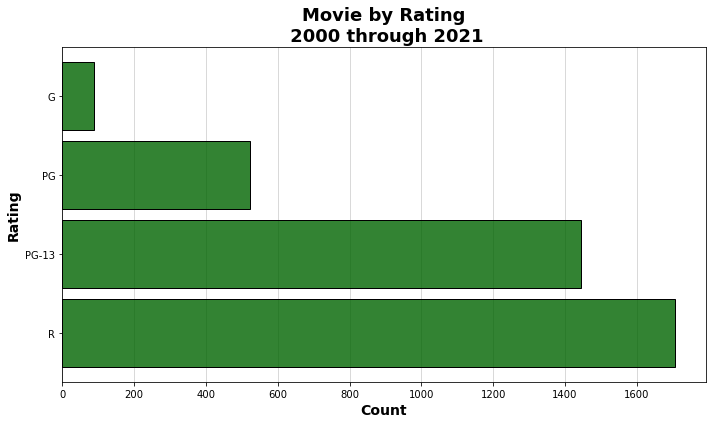

In [44]:
## Visualize Distribution by Rating
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(y = tmdb_viz['certification'], 
             color = "#006400", alpha = .8, shrink = .85)
plt.title('Movie by Rating\n 2000 through 2021', 
             fontsize = 18, weight = 'bold')
plt.xlabel('Count', fontsize=14, weight = 'semibold')
plt.ylabel('Rating',  fontsize=14, weight = 'semibold')
plt.grid(axis = 'x', alpha = .6)
ax.set_axisbelow(True)
fig.tight_layout()

### Viz: Mean Budget and Revenue by Rating

In [45]:
tmdb_viz.groupby('certification')['budget_adj'].mean().sort_values(ascending = False)

certification
PG       7.343425e+07
G        6.811639e+07
PG-13    6.685344e+07
R        3.024336e+07
Name: budget_adj, dtype: float64

In [46]:
tmdb_viz.groupby('certification')['revenue_adj'].mean().sort_values(ascending = False)

certification
PG       2.240096e+08
G        2.147332e+08
PG-13    1.963111e+08
R        7.069939e+07
Name: revenue_adj, dtype: float64

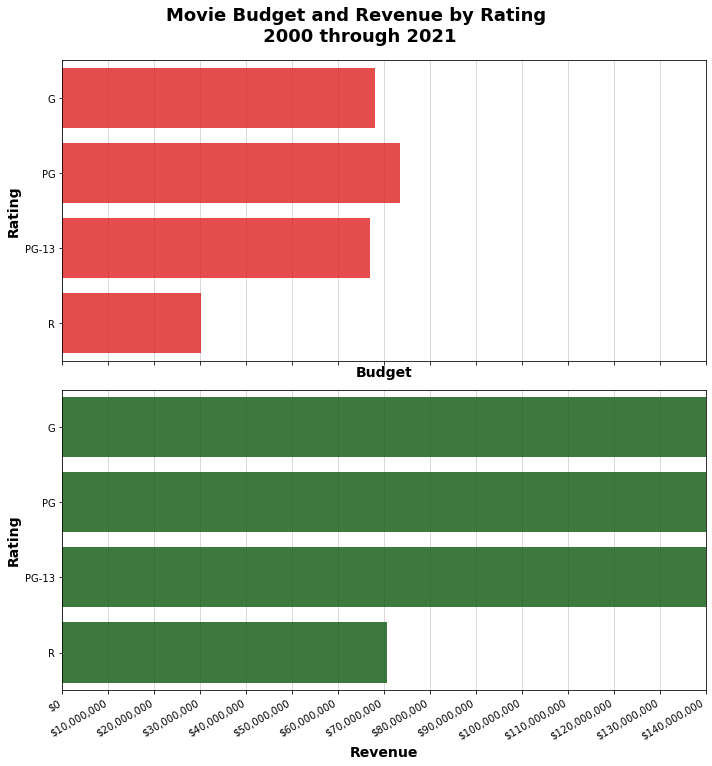

In [47]:
# Import string formatter for labels
from matplotlib.ticker import StrMethodFormatter

# Attempt 1 at comparing budget/revene on rating
fig, axes = plt.subplots(figsize=(10,10), nrows = 2, sharex = True)
plt.suptitle('Movie Budget and Revenue by Rating\n 2000 through 2021', 
             fontsize = 18, weight = 'bold', y = 1.06)
sns.barplot(data = tmdb_viz, x = 'budget_adj', y = 'certification', 
            ci = None, color = "red", alpha = .8, ax = axes[0])
axes[0].set_xlabel('Budget', fontsize=14, weight = 'semibold')
axes[0].set_ylabel('Rating',  fontsize=14, weight = 'semibold')
sns.barplot(data = tmdb_viz, x = 'revenue_adj', y = 'certification', 
            ci = None, color = "#006400", alpha = .8, ax = axes[1])
axes[1].set_xlabel('Revenue', fontsize=14, weight = 'semibold')
axes[1].set_ylabel('Rating',  fontsize=14, weight = 'semibold')
[ax.grid(axis = 'x', alpha = .6) for ax in axes]
[ax.set_axisbelow(True) for ax in axes]
axes[1].xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xlim(0,140000000)
plt.xticks(range(0, 141000000, 10000000),rotation = 30, ha = 'right')
fig.tight_layout()

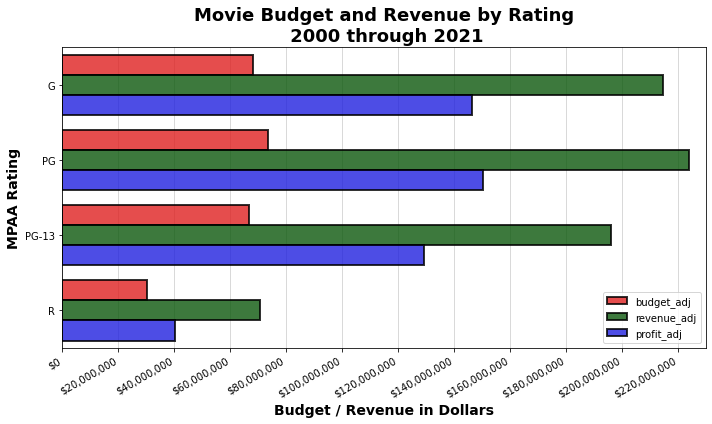

In [48]:
# Attempt 2 at comparing budget/revene on rating
palette ={"budget_adj": "red", "revenue_adj": "#006400", "profit_adj": 'blue'}

fig, axes = plt.subplots(figsize=(10,6), ncols = 1, nrows = 1)
sns.barplot(data = tmdb_viz.melt('certification', 
                                 value_vars = ['budget_adj', 'revenue_adj', 'profit_adj']),
            x = 'value', y = 'certification', hue = 'variable', 
            palette = palette, alpha = .8, ci = None, 
            edgecolor = 'black', lw = '2', ax = axes)
plt.title('Movie Budget and Revenue by Rating\n 2000 through 2021', 
             fontsize = 18, weight = 'bold')
plt.xlabel('Budget / Revenue in Dollars', fontsize=14, weight = 'semibold')
plt.ylabel('MPAA Rating',  fontsize=14, weight = 'semibold')
axes.grid(axis = 'x', alpha = .6, zorder = 0)
axes.set_axisbelow(True)
axes.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
axes.legend(title = None, )
plt.xlim(0,230000000)
plt.xticks(range(0, 230001000, 20000000),rotation = 30, ha = 'right')
fig.tight_layout();

### Viz: Relationship between Budget and Revenue

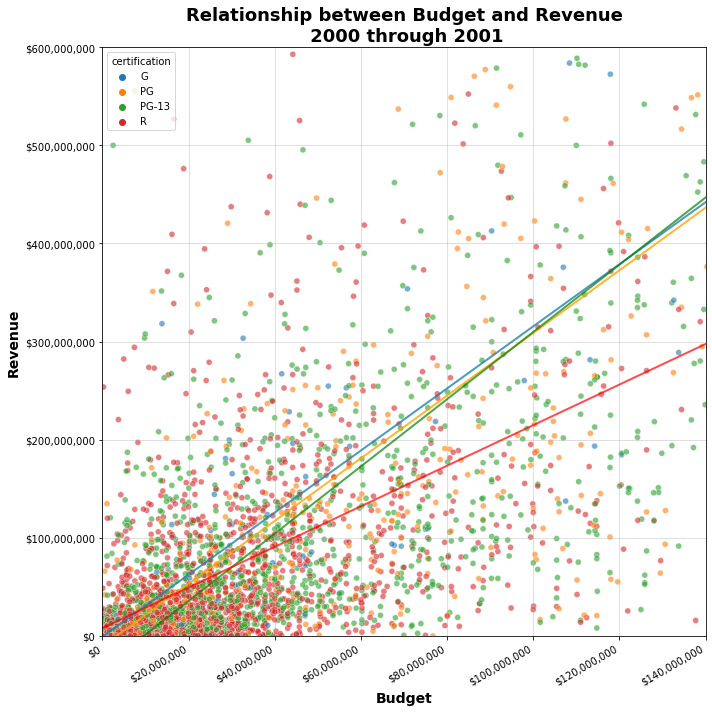

In [49]:
fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(data = tmdb_viz, x = 'budget_adj', y = 'revenue_adj', hue = "certification", alpha = .6);
sns.regplot(data=tmdb_viz[tmdb_viz['certification'] == 'G'], x = 'budget_adj', y = 'revenue_adj', 
            scatter_kws={'s':0}, ci=None,
            line_kws={'color': '#1e81b0', 'lw' : 2, 'alpha' : .8})
sns.regplot(data=tmdb_viz[tmdb_viz['certification'] == 'PG'], x = 'budget_adj', y = 'revenue_adj', 
            scatter_kws={'s':0}, ci=None,
            line_kws={'color': "orange", 'lw' : 2, 'alpha' : .8})
sns.regplot(data=tmdb_viz[tmdb_viz['certification'] == 'PG-13'], x = 'budget_adj', y = 'revenue_adj', 
            scatter_kws={'s':0}, ci=None,
            line_kws={'color': "green", 'lw' : 2, 'alpha' : .7})
sns.regplot(data=tmdb_viz[tmdb_viz['certification'] == 'R'], x = 'budget_adj', y = 'revenue_adj', 
            scatter_kws={'s':0}, ci=None,
            line_kws={'color': "red", 'lw' : 2, 'alpha' : .7})
# sns.regplot(data=tmdb_viz[tmdb_viz['certification'] == 'NR'], x = 'budget', y = 'revenue', 
#             scatter_kws={'s':0}, ci=None,
#             line_kws={'color': "purple", 'lw' : 2, 'alpha' : .7})
# sns.regplot(data=tmdb_viz[tmdb_viz['certification'] == 'NC-17'], x = 'budget', y = 'revenue', 
#             scatter_kws={'s':0}, ci=None,
#             line_kws={'color': "brown", 'lw' : 2, 'alpha' : .7})
plt.title('Relationship between Budget and Revenue\n 2000 through 2001', 
             fontsize = 18, weight = 'bold')
plt.xlabel('Budget', fontsize=14, weight = 'semibold')
plt.ylabel('Revenue',  fontsize=14, weight = 'semibold')
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xlim(0,140000000)
plt.ylim(0,600000000)
plt.grid(alpha = .5)
plt.xticks(rotation = 30, ha = 'right')
fig.tight_layout()

# Appendix
Future graphics for further discovery.

In [50]:
tmdb_merged = pd.read_csv(f"{FOLDER}tmdb_merged.csv.gz")

In [51]:
tmdb_merged.columns

Index(['tconst', 'belongs_to_collection', 'production_companies',
       'production_countries', 'status', 'certification', 'year', 'month',
       'day', 'budget_adj', 'revenue_adj', 'profit_adj'],
      dtype='object')

In [52]:
# red_notice = tmdb_merged[tmdb_merged['imdb_id'] == 'tt7991608']
# red_notice['revenue']

In [53]:
tmdb_brett = tmdb_merged.copy()
tmdb_brett = tmdb_brett[tmdb_brett['revenue_adj'] != 0]
tmdb_brett = tmdb_brett[tmdb_brett['budget_adj'] != 0]

nr = tmdb_brett['certification'] == 'NR'
unrated = tmdb_brett['certification'] == 'Unrated'
nc17 = tmdb_brett['certification'] == 'NC-17'

tmdb_brett = tmdb_brett[~(nr | unrated | nc17)]
tmdb_brett.dropna(subset= ['certification'], inplace = True)

tmdb_brett['brett'] = tmdb_brett['revenue_adj']/tmdb_brett['budget_adj']
tmdb_brett.head()

,tconst,belongs_to_collection,production_companies,production_countries,status,certification,year,month,day,budget_adj,revenue_adj,profit_adj,brett
3,tt0118694,0,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",Released,PG,2000,9,29,2.360366e+05,2.022826e+07,1.999222e+07,85.699685
10,tt0120467,0,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",Released,R,2002,4,26,1.807471e+05,2.244879e+04,-1.582983e+05,0.124200
12,tt0120630,1,"[{'id': 521, 'logo_path': '/kP7t6RwGz2AvvTkvnI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",Released,G,2000,6,21,7.081098e+07,3.537946e+08,2.829836e+08,4.996324
15,tt0120753,0,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...","[{'iso_3166_1': 'US', 'name': 'United States o...",Released,R,2000,2,9,1.258862e+07,1.667724e+05,-1.242185e+07,0.013248
16,tt0120755,1,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",Released,PG-13,2000,5,24,1.966972e+08,8.597839e+08,6.630867e+08,4.371105


In [54]:
red_notice = tmdb_brett[tmdb_brett['tconst'].str.contains('tt7991608')]

KeyError: 'vote_average'

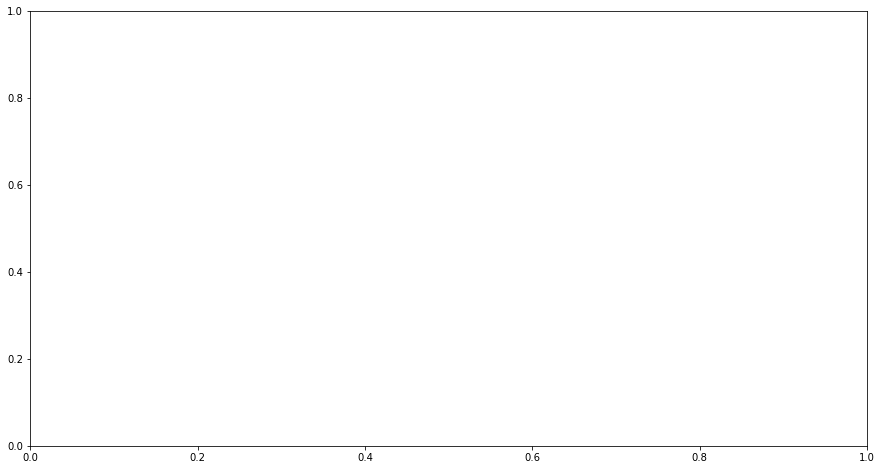

In [55]:
fig, ax = plt.subplots(figsize = (15,8))
sns.scatterplot(data = tmdb_brett, x = tmdb_brett['brett'], y = tmdb_merged['vote_average'],
               hue = 'certification', alpha = .7)
sns.scatterplot(data = tmdb_brett, x = red_notice['brett'], y = red_notice['vote_average'],
               color = 'k', marker = 'o')
plt.xlim(0, 20)
plt.ylim(3,9)
plt.grid(alpha = .3)
plt.ylabel('Popularity', size = 18, weight = 'semibold')
plt.xlabel('Revenue to Budget Ratio',size = 18, weight = 'semibold')
plt.annotate("Red Notice", xy = (red_notice['brett'], red_notice['vote_average']),
         xytext=(red_notice['brett']+.5, red_notice['vote_average']-.4), 
             arrowprops=dict(arrowstyle='->'), size = 14, weight = 'semibold');

In [ ]:
drop_list=['adult', 'runtime', 'genres', 'release_date', 'backdrop_path', 'homepage', 
           'tagline', 'poster_path', 'original_title', 'id', 'video', 'overview', 
           'original_language', 'spoken_languages']

tmdb_brett.drop(columns = drop_list, inplace = True)


tmdb_brett.sort_values(by = ['brett'], ascending = False)
# .sort_values(tmdb_brett['brett'], ascending = False)